### Overview

This week, we learned about ensemble methods, APIs, and natural language processing. Now we're going to put these skills to the test. You've been hired by Netflix to examine what factors lead to certain ratings for movies. Given that Netflix does not currently store this type of data, your boss has suggested that you collect ratings and reviews data from IMDB. Netflix is no stranger to machine learning, however:

- Netflix uses random forests and decision trees to predict what types of movies an individual user may like.
- Using unsupervised learning techniques, they are able to continually update suggestions, listings, and other features of it's user interface.
- Netflix, however, hasn't focused on collecting data on the top movies of all time, and would like to add some of them to their offerings based on popularity and other factors.

Point: Your boss isn't sure where to start on this project, so your task is to collect the data and construct a random forest to understand what factors contribute to ratings.

### Project Summary

Acquire data from IMDB, and use whatever metrics you can collect to predict whether it is a good movie.

When you've finished your analysis, Netflix would like a report detailing your findings, with recommendations as to next steps.

Here are some questions to keep in mind:

- What factors are the most direct predictors of rating?
- You can use rating as your target variable. But it's up to you whether to treat it as continuous, binary, or multiclass.

Goal: Completed Jupyter notebook that includes modeling using a random forest and an blog post explaining your findings.

### Requirements

This is deliberately open ended. There is no starter code. It's up to you how to acquire the data, store the data, and what features you want to use.

We expect you to use a tree-based model, but the rest of the decisions are up to you.

We will be looking for the following things:

- A clear problem statement & description of the goals of your study to be included in the final report
- Data from IMDB
- Cleaned and refined data
- Visualization. Plots that describe your data and evaluate your model.
- Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting).
- A blog post presenting the results of your findings as a report to Netflix, including:
    - a problem statement,
    - summary statistics of the various factors (e.g. year, number of ratings, etc.), your model,
    - at least 2 graphics,
    - and your recommendations for next steps!

### Necessary Deliverables / Submission

- Materials must be in a clearly labeled Jupyter notebook
- Link to the blog post with your report in your Jupyter notebook
- Materials must be submitted to GitHub by Thursday of Week 7 (July 21).

## + API & Scraping +

In [2]:
# import and setup API
from imdbpie import Imdb
import pandas as pd
imdb = Imdb()
imdb = Imdb(anonymize=True)

In [3]:
# get the top 250 movies from API 
df = pd.DataFrame(imdb.top_250())
pop = pd.DataFrame(imdb.popular_shows())
df.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1682164,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1150827,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,787155,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1667054,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,860931,8.9,tt0108052,Schindler's List,feature,1993


In [4]:
# import beautiful soup for scraping 
import requests
import bs4 as soup
from bs4 import BeautifulSoup

In [223]:
# creating for loops to scrap IMDB pages of each individual movie
dfs1 = pd.DataFrame()
dfs2 = pd.DataFrame()
dfs3 = pd.DataFrame()
for i in df.tconst: 
    url1 = 'http://www.imdb.com/title/'
    r = requests.get(url1 + i)
    soup = BeautifulSoup(r.content, "lxml")
    print i
    for x in soup.findAll('div',{'class':'title_block'}):
        try: 
            title = x.find('h1',{'itemprop':'name'}).getText()
            rating1 = x.findAll('div',{'class':'ratingValue'})[0].getText()
            rating_count = x.findAll('span',{'itemprop':'ratingCount'})[0].getText()
            subtext = x.findAll('div',{'class':'subtext'})[0].getText()
            user = x.findAll('span',{'itemprop':'reviewCount'})[0].getText()
            critics = x.findAll('span',{'itemprop':'reviewCount'})[1].getText()
            rating = x.findAll('meta',{'itemprop':'contentRating'})
            time = x.findAll('time',{'itemprop':'duration'})[0].getText()
            date = x.findAll('a')[-1].getText()
            dfs1 = dfs1.append({'tconst':i,'title':title, 'rating1':rating1, 'rating_count':rating_count,'subtext':subtext,'user': user, 'critics': critics, 'rating': rating, 'time': time,'date':date}, ignore_index=True)
        except:
            pass
    for x in soup.findAll('div',{'class':'plot_summary'}):
        try:
            description = x.find('div', {'itemprop':'description'}).getText()
            director = x.find('span', {'itemprop':'name'}).getText()
            writer = x.findAll('span', {'itemprop':'creator'})[0].getText()
            star1 = x.findAll('span', {'itemprop':'actors'})[0].getText()
            star2 = x.findAll('span', {'itemprop':'actors'})[1].getText()
            star3 = x.findAll('span', {'itemprop':'actors'})[2].getText()
            dfs2 = dfs2.append({'tconst':i,'description':description,'director': director, 'writer': writer, 'star1': star1, 'star2': star2, 'star3':star3}, ignore_index=True)
        except:
            pass
    for x in soup.findAll('div',{'id':'titleDetails'},{'class':'article'}):
        try:
            buf1 = x.findAll('div','txt-block')[0].getText().strip()
            country =  x.findAll('div','txt-block')[1].getText().strip()
            language = x.findAll('div','txt-block')[2].getText().strip()
            date = x.findAll('div','txt-block')[3].getText().strip()
            buf2 = x.findAll('div','txt-block')[4].getText().strip()
            location = x.findAll('div','txt-block')[5].getText().strip()
            budget = x.findAll('div','txt-block')[6].getText().strip()
            gross = x.findAll('div','txt-block')[7].getText().strip()
            production = x.findAll('div','txt-block')[8].getText().strip()
            buf = x.findAll('div','txt-block')[9].getText().strip()
            runtime = x.findAll('div','txt-block')[10].getText().strip()
            sound = x.findAll('div','txt-block')[11].getText().strip()
            dfs3 = dfs3.append({'tconst':i,'buf1':buf1,'country1':country,'language1':language,'date1':date,'buf2':buf2,'loction1': location, 'budget1': budget, 'gross1':gross,'production1':production,'buf': buf,'runtime1':runtime,'sound':sound}, ignore_index=True)
        except: 
            print 'Passed'

tt0111161
tt0068646
tt0071562
tt0468569
tt0108052
tt0050083
tt0110912
tt0167260
tt0060196
tt0137523
tt0120737
tt0080684
tt0109830
tt1375666
tt0167261
tt0073486
tt0099685
tt0133093
tt0047478
tt0076759
tt0317248
tt0114369
tt0102926
tt0038650
tt0114814
tt0118799
tt0110413
tt0064116
tt0245429
tt0120815
tt0120586
tt0816692
tt0034583
tt0054215
tt0021749
tt0082971
tt1675434
tt0027977
tt0120689
tt0047396
tt0103064
tt0407887
tt0253474
tt0088763
tt2582802
tt0172495
tt0209144
tt0078788
tt0482571
tt0110357
tt0057012
tt0043014
tt0078748
tt0032553
tt0405094
tt0095765
tt1853728
tt0050825
tt0081505
tt0095327
tt0910970
tt1345836
tt0169547
tt0090605
tt0119698
tt0364569
tt0033467
tt0087843
tt0053125
tt0082096
tt0052357
tt0051201
tt0086190
tt0022100
tt0105236
tt0112573
tt0211915
tt0180093
tt0066921
tt0075314
tt0036775
tt0435761
tt0056172
tt0056592
tt0338013
tt0086879
tt0093058
tt0070735
tt0062622
tt0040522
tt0045152
tt0114709
tt0208092
tt0361748
tt0071853
tt0012349
tt0119488
tt0059578
tt0042876
tt0053604


In [224]:
# save this dataframes to csv
dfs1.to_csv('final1.csv', encoding='utf-8')
# dfs2.to_csv('final2.csv', encoding='utf-8')
# dfs3.to_csv('final3.csv', encoding='utf-8')

In [ ]:
# quick check at those dataframes
temp = pd.merge(dfs1, dfs2, on='tconst', how= 'outer')
temp.isnull().any()

## + Data Cleaning +

In [243]:
# read in dataframe for future work
dfs1 = pd.read_csv('final1.csv')
dfs2 = pd.read_csv('final2.csv')
dfs3 = pd.read_csv('final3.csv')

In [244]:
import numpy as np

#### clean up the first dataframe

In [245]:
# clean up dfs1 
# clean up column "critics"
def critics(x):
    try: 
        y = x.replace(' critic','')
        z = y.replace(',','')
        return z
    except: 
        pass
dfs1['critics']= dfs1['critics'].apply(critics)

In [246]:
# clean up content rating
def contentRating(x):
    try: 
        y = x.replace('[<meta content="','')
        z = y.replace('" itemprop="contentRating"/>]','')
        return z
    except: 
        pass

dfs1['content_rating'] = dfs1['rating'].apply(contentRating)
# dfs1['rating_c'].replace('[]',np.nan,inplace=True)

In [247]:
# append all genre into a list
dfs1['genre'] = dfs1['subtext']
dfs1['genre'] = [x.split('                    ') for x in dfs1.genre]
dfs1['genre'] = [x[2] for x in dfs1.genre]
dfs1['genre'] = [x.split('\n|\n') for x in dfs1.genre]
dfs1['genre'] = [x[1] for x in dfs1.genre]
dfs1['genre'] = [x.split(', \n') for x in dfs1.genre]

In [248]:
# clean up user column 
def user(x):
    try: 
        y = x.replace(' user','')
        z = y.replace(',','')
        return z
    except: 
        pass
dfs1['user']= dfs1['user'].apply(user)

In [249]:
# convert runtime into minutes
def time(x):
    try: 
        y = x.replace('\n                        ','')
        z = y.replace('min\n                    ','')
        a = z.replace('h\n                    ','')
        return a
    except: 
        pass
dfs1['time']= dfs1['time'].apply(time)
dfs1['time'] = [x.split('h ') for x in dfs1.time]
m = []
for x in dfs1.time: 
    try: 
        m.append(int(x[0])*60+int(x[1]))
    except: 
        m.append(int(x[0])*60)
dfs1['runtime'] = m

In [250]:
# delete extra columns
dfs1 = dfs1.drop(['rating','Unnamed: 0','date','rating1','rating_count','subtext','time'], axis =1)

#### clean up the second dataframe

In [251]:
# clean up dfs2 
def clean(x):
    try: 
        y = x.replace('\n','')
        z = y.replace(',             ','')
        return z
    except: 
        pass
dfs2['star1']= dfs2['star1'].apply(clean)
dfs2['star2']= dfs2['star2'].apply(clean)
dfs2['star3']= dfs2['star3'].apply(clean)
dfs2['writer']= dfs2['writer'].apply(clean)
def clean_d(x):
    try: 
        y = x.replace('\n                    ','')
        z = y.replace('\n            ','')
        return z
    except: 
        pass
dfs2['description']= dfs2['description'].apply(clean_d)

#### clean up the third dataframe 

In [252]:
# resort some of the columns
for x in dfs3.columns[1:12]:
    print x
    dfs3.loc[dfs3[x].str.contains('Budget'), 'budget'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Opening'), 'opening'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Country'), 'country'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Gross'), 'gross'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Language'), 'language'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Location'), 'loction'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Country'), 'country'] = dfs3[x]
    dfs3.loc[dfs3[x].str.contains('Runtime'), 'runtime'] = dfs3[x]

budget1
buf
buf1
buf2
country1
date1
gross1
language1
loction1
production1
runtime1


In [253]:
# rename the columns 
c = ['Unnamed: 0','budget1','buf','buf1','buf2','country1','date1','gross1','language1','loction1','production1','runtime1','sound']
dfs3 = dfs3.drop(c, axis=1)

In [254]:
# check number of values in each column
dfs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
tconst      238 non-null object
budget      231 non-null object
opening     149 non-null object
country     238 non-null object
gross       185 non-null object
language    238 non-null object
loction     228 non-null object
runtime     124 non-null object
dtypes: object(8)
memory usage: 14.9+ KB


In [255]:
# get rid off symbols 
def clean_o(x):
    try: 
        y = x.split('        ')
        return y[1].replace(' ','')
    except: 
        pass
dfs3['opening'] = dfs3['opening'].apply(clean_o)
dfs3['gross'] = dfs3['gross'].apply(clean_o)
dfs3['budget'] = dfs3['budget'].apply(clean_o)

In [256]:
# check cleaning
dfs3[['gross','budget','opening']].head()

,gross,budget,opening
0,"$28,341,469","$25,000,000",None
1,"$134,821,952","$6,000,000","$223,758"
2,"$57,300,000","$13,000,000",None
3,"$533,316,061","$185,000,000","$158,411,483"
4,"$96,067,179","$22,000,000","£1,234,591"


In [257]:
dfs3.loction[3]

'Filming Locations:\nTimes Square, Causeway Bay, Hong Kong\n\nSee more\xc2\xa0\xc2\xbb'

In [258]:
# clean up location column
# temp = [x.split() for x in dfs3.loction]
def clean_l(x):
    try: 
        y = x.replace('Filming Locations:\n','')
        return y.replace('\n\nSee more\xc2\xa0\xc2\xbb','')
    except: 
        pass
dfs3['location'] = dfs3['loction'].apply(clean_l)

### get more clean data using Json

In [259]:
import json
import urllib
import re

In [260]:
# Get the movie IDs info for top 250
def get_top_250():
    response = requests.get('http://www.imdb.com/chart/top')
    html = response.text
    entries = re.findall("<a href.*?/title/(.*?)/", html)
    return list(set(entries))
entries = get_top_250()
len(entries)
entries[0]

u'tt2582802'

In [261]:
# get the data info for the top 250 movies
def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j
entries_dict_list = [get_entry(e) for e in entries]

dfj = pd.DataFrame(entries_dict_list)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [262]:
# merge dataframes
temp = pd.merge(dfj, dfs1[['user','critics','tconst','runtime']], left_on = 'imdbID', right_on = 'tconst', how = 'outer')
temp = pd.merge(temp, dfs3[['location','gross','budget','opening','tconst']], on='tconst', how = 'outer')

In [263]:
dfj

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 128 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,http://ia.media-imdb.com/images/M/MV5BMTU4OTQ3...,R,15 Oct 2014,True,107 min,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,"384,504"
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,99,A poor village under attack by bandits recruit...,http://ia.media-imdb.com/images/M/MV5BMTc5MDY1...,UNRATED,19 Nov 1956,True,207 min,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,"226,364"
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 29 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,http://ia.media-imdb.com/images/M/MV5BMjA0ODEz...,PG,12 Jun 1981,True,115 min,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,"653,557"
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, War","English, Japanese, Thai",N/A,After settling his differences with a Japanese...,http://ia.media-imdb.com/images/M/MV5BMTc2NzA0...,PG,14 Dec 1957,True,161 min,The Bridge on the River Kwai,movie,"Pierre Boulle (novel), Carl Foreman (screenpla...",1957,tt0050212,8.2,"147,591"
4,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 36 wins & 78 no...,USA,Joss Whedon,"Action, Adventure, Sci-Fi","English, Russian",69,Earth's mightiest heroes must come together an...,http://ia.media-imdb.com/images/M/MV5BMTk2NTI1...,PG-13,04 May 2012,True,143 min,The Avengers,movie,"Joss Whedon (screenplay), Zak Penn (story), Jo...",2012,tt0848228,8.1,"980,989"
5,"Leonardo DiCaprio, Tom Hardy, Domhnall Gleeson...",Won 3 Oscars. Another 73 wins & 156 nominations.,"USA, Hong Kong, Taiwan, Canada",Alejandro G. Iñárritu,"Adventure, Drama, Thriller","English, Pawnee, French",76,A frontiersman on a fur trading expedition in ...,http://ia.media-imdb.com/images/M/MV5BMjU4NDEx...,R,08 Jan 2016,True,156 min,The Revenant,movie,"Mark L. Smith (screenplay), Alejandro G. Iñárr...",2015,tt1663202,8.1,"377,143"
6,"Andy Lau, Tony Chiu Wai Leung, Anthony Chau-Sa...",23 wins & 21 nominations.,Hong Kong,"Wai-Keung Lau, Alan Mak","Crime, Mystery, Thriller","Cantonese, English, Thai",75,A story between a mole in the police departmen...,http://ia.media-imdb.com/images/M/MV5BMTc0Mjg2...,R,12 Dec 2002,True,101 min,Infernal Affairs,movie,"Alan Mak, Felix Chong",2002,tt0338564,8.1,"90,435"
7,"Yves Montand, Charles Vanel, Folco Lulli, Pete...",Won 1 BAFTA Film Award. Another 5 wins.,"France, Italy",Henri-Georges Clouzot,"Adventure, Drama, Thriller","French, English, Spanish, German, Italian, Rus...",N/A,"In a decrepit South American village, men are ...",http://ia.media-imdb.com/images/M/MV5BMTQ5Mzky...,NOT RATED,16 Feb 1955,True,131 min,The Wages of Fear,movie,"Georges Arnaud (novel), Henri-Georges Clouzot ...",1953,tt0046268,8.2,"34,849"
8,"Toshirô Mifune, Tatsuya Nakadai, Yôko Tsukasa,...",Nominated for 1 Oscar. Another 4 wins & 1 nomi...,Japan,Akira Kurosawa,"Comedy, Drama, Thriller",Japanese,N/A,A crafty ronin comes to a town divided by two ...,http://ia.media-imdb.com/images/M/MV5BMjAwNTQ3...,UNRATED,13 Sep 1961,True,110 min,Yojimbo,movie,"Akira Kurosawa (story), Akira Kurosawa (screen...",1961,tt0055630,8.3,"73,272"
9,"Albert Brooks, Ellen DeGeneres, Alexander Goul...",Won 1 Oscar. Another 46 wins & 59 nominations.,USA,"Andrew Stanton, Lee Unkrich","Animation, Adventure, Comedy",English,90,After his son

In [264]:
# overview of the meraged dataframe
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 28 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
user          250 non-null object
critics       250 non-null object
tconst        251 non-null object
runtime       250 non-null float64
location      228 non-null object
gross         185 non-null object
budget    

In [265]:
# clean up temp
def month(x):
    try: 
        y = x.split(' ')
        return y[1]
    except: 
        pass
temp['month'] = temp['Released'].apply(month)
temp.month[0]

u'Oct'

In [266]:
# clean up rating number column 
temp['rating_n'] = [float(str(x).replace(',', '')) for x in temp.imdbVotes]

In [267]:
# change datatype for some columns
temp['rating'] = [float(x) for x in temp.imdbRating]
temp['runtime'] = [float(x) for x in temp.runtime]
temp['user'] = [float(x) for x in temp.user]
temp['critics'] = [float(x) for x in temp.critics]
temp['year'] = [float(x) for x in temp.Year]

In [268]:
# change month to numeric
d = {'Jan':1,'Feb':2,'Mar':3,'Apr' : 4,'May' : 5,'Jun' : 6,'Jul' : 7,'Aug' : 8,'Sep' : 9, 'Oct' : 10,'Nov' : 11,'Dec' : 12}   
def month_s(x):
    for k in d: 
        if x == k:
            return d[k]
        
temp['month'] = temp['month'].apply(month_s)

In [269]:
# check NaNs 
null_data = temp[temp[['month']].isnull().any(axis=1)]
null_data

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,tconst,runtime,location,gross,budget,opening,month,rating_n,rating,year
75,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",Nominated for 2 Oscars. Another 3 wins & 1 nom...,USA,Charles Chaplin,"Adventure, Comedy, Drama",English,N/A,A prospector goes to the Klondike in search of...,http://ia.media-imdb.com/images/M/MV5BMzYzMDQy...,NOT RATED,...,tt0015864,95.0,"California, USA",None,"$923,000",None,NaN,66903.0,8.3,1925.0
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt0118694,NaN,"Angkor Wat, Siem Reap, Cambodia","$2,734,044",None,"£92,227",NaN,NaN,NaN,NaN


In [270]:
null_data = temp[temp[['critics']].isnull().any(axis=1)]
null_data

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,...,tconst,runtime,location,gross,budget,opening,month,rating_n,rating,year
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,tt0118694,NaN,"Angkor Wat, Siem Reap, Cambodia","$2,734,044",None,"£92,227",NaN,NaN,NaN,NaN


In [271]:
# fill in the missing value
temp.month[temp['tconst'] == 'tt0015864'] = 6.0

/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [272]:
temp =  temp[temp.month.notnull()]

In [273]:
# reorganize ratings 
temp['Rated'] = [str(x).replace('NOT RATED', 'UNRATED') for x in temp.Rated]
temp['Rated'] = [str(x).replace('N/A', 'UNRATED') for x in temp.Rated]
temp['Rated'] = [str(x).replace('PASSED', 'UNRATED') for x in temp.Rated]
temp['Rated'] = [str(x).replace('APPROVED', 'UNRATED') for x in temp.Rated]
temp['Rated'] = [str(x).replace('M', 'PG') for x in temp.Rated]

In [274]:
# clean up rating infomation 
temp.Rated.value_counts()

R          104
UNRATED     60
PG          38
PG-13       34
G           13
X            1
Name: Rated, dtype: int64

In [275]:
# set it to a new dataframe 
ndf =temp

## + Exploratory Data Analysis +

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [277]:
# basic numeric analysis 
ndf.describe().round(3)

,user,critics,runtime,month,rating_n,rating,year
count,250.000,250.000,250.000,250.000,250.000,250.000,250.000
mean,818.348,234.528,129.132,6.588,400026.128,8.317,1984.032
std,793.595,153.157,32.607,3.601,329171.137,0.232,24.155
min,78.000,18.000,67.000,1.000,24841.000,8.000,1921.000
25%,289.000,131.250,107.000,3.000,121674.500,8.100,1964.000
50%,592.500,182.000,124.000,6.000,320500.500,8.300,1991.000
75%,1025.750,285.500,143.000,10.000,589851.000,8.400,2003.750
max,5060.000,812.000,320.000,12.000,1668622.000,9.300,2016.000


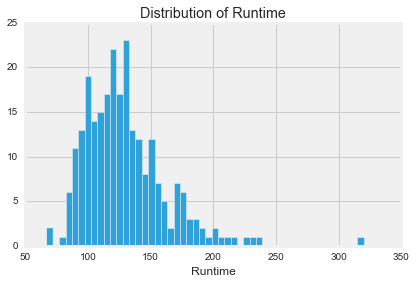

In [278]:
# distribution of runtime 
ndf.runtime.hist(bins = 50)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')

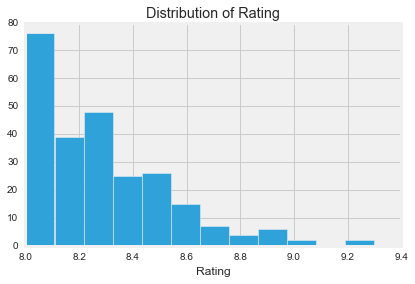

In [279]:
# distribution of rating 
ndf.rating.hist(bins = 12)
plt.title('Distribution of Rating')
plt.xlabel('Rating')

Rated
G           13
PG          38
PG-13       34
R          104
UNRATED     60
X            1
Name: rating, dtype: int64

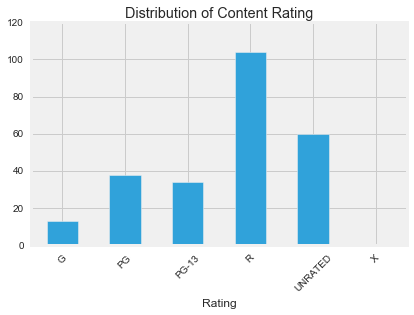

In [280]:
# distribution of content rating 
p = pd.pivot_table(ndf, index = 'Rated', values = 'rating', aggfunc = 'count')
p.plot(kind = 'bar', rot = 45)
plt.title('Distribution of Content Rating')
plt.xlabel('Rating')
p

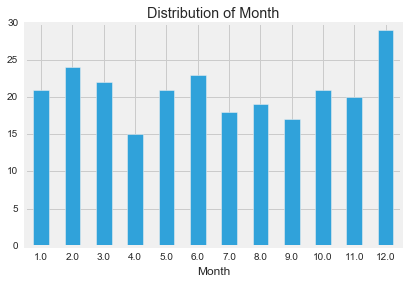

In [281]:
# plot the distribution of months
p = pd.pivot_table(ndf, index = 'month', values = 'rating', aggfunc = 'count')
p.plot(kind = 'bar', rot = 360)
plt.title('Distribution of Month')
plt.xlabel('Month')

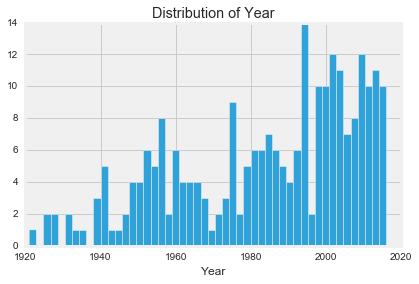

In [282]:
# plot the distribution of year 
ndf.year.hist(bins = 50)
plt.title('Distribution of Year')
plt.xlabel('Year')

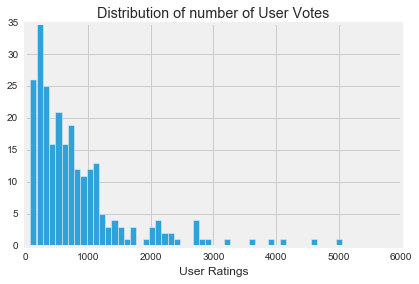

In [283]:
# plot the distribution of user ratings 
ndf.user.hist(bins = 50)
plt.title('Distribution of number of User Votes')
plt.xlabel('User Ratings')

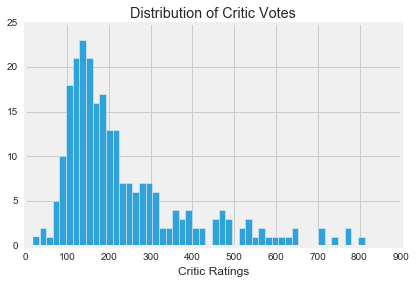

In [284]:
# plot the distribution of user ratings 
ndf.critics.hist(bins = 50)
plt.title('Distribution of Critic Votes')
plt.xlabel('Critic Ratings')

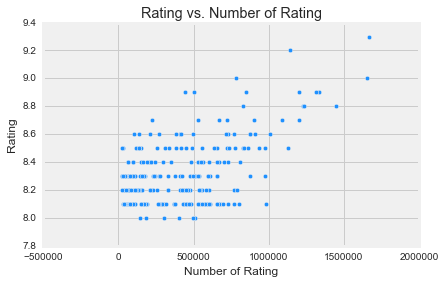

In [285]:
# plot the relationship between ratings and number of ratings 
plt.scatter(ndf.rating_n, ndf.rating, c= 'dodgerblue')
plt.title('Rating vs. Number of Rating')
plt.xlabel('Number of Rating')
plt.ylabel('Rating')

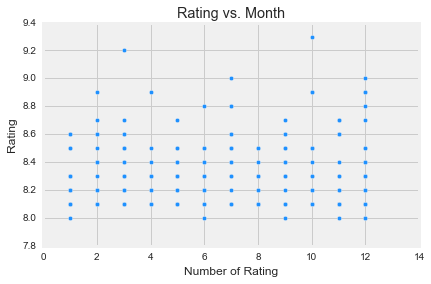

In [286]:
# correlation between month and rating 
plt.scatter(ndf.month, ndf.rating, c= 'dodgerblue')
plt.title('Rating vs. Month')
plt.xlabel('Number of Rating')
plt.ylabel('Rating')

/Users/Lydia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Lydia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


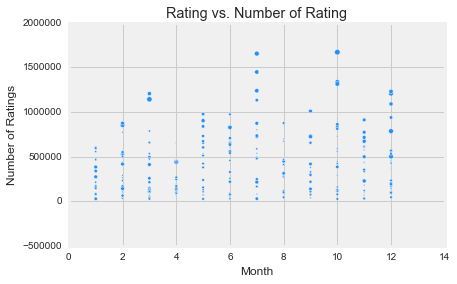

In [287]:
# correlation between month and rating number, dot size represents rating 
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit_transform(ndf.rating)
s1 = [x*30 for x in s]
plt.scatter(ndf.month, ndf.rating_n, s=s1, c= 'dodgerblue')
plt.title('Rating vs. Number of Rating')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')

/Users/Lydia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Lydia/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


[1915, 2025, 0, 2000000]

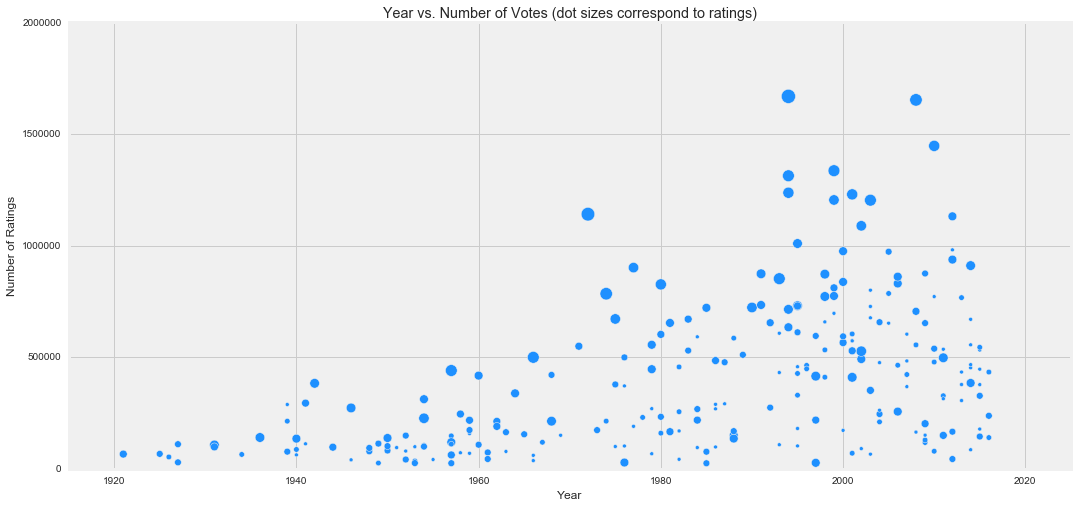

In [288]:
# correlation between year and number of votes 
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit_transform(ndf.rating)
s1 = [x*200 for x in s]
plt.figure(figsize =(16,8))
plt.scatter(ndf.year, ndf.rating_n, s=s1, c= 'dodgerblue')
plt.title('Year vs. Number of Votes (dot sizes correspond to ratings)')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.axis([1915,2025,0,2000000])

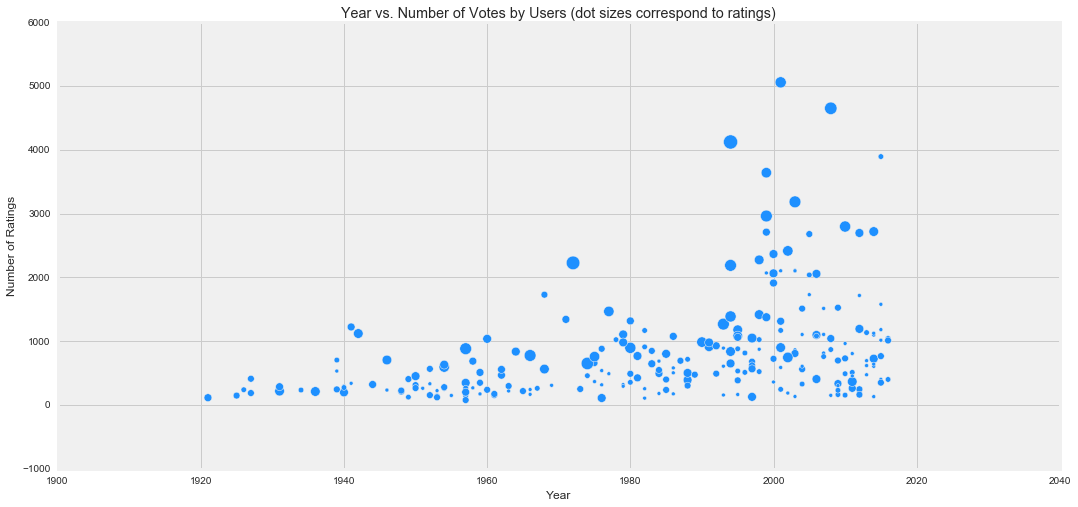

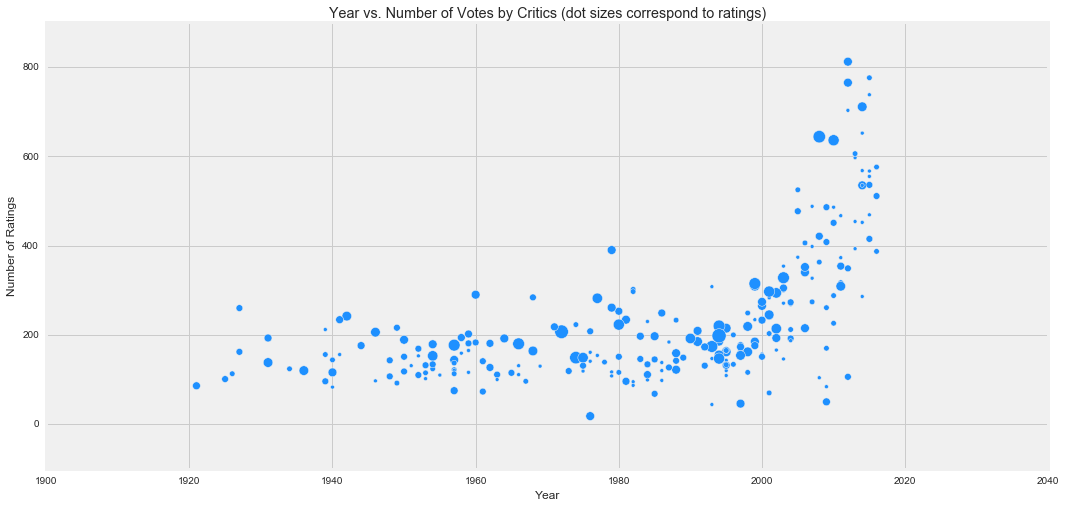

In [289]:
# correlation between user rating and year 
plt.figure(figsize =(16,8))
plt.scatter(ndf.year, ndf.user, s=s1, c= 'dodgerblue')
plt.title('Year vs. Number of Votes by Users (dot sizes correspond to ratings)')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
# correlation between critics rating and year
plt.figure(figsize =(16,8))
plt.scatter(ndf.year, ndf.critics, s=s1, c= 'dodgerblue')
plt.title('Year vs. Number of Votes by Critics (dot sizes correspond to ratings)')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')

## + Analysis Preparation +

In [290]:
from sklearn.feature_extraction.text import CountVectorizer

In [291]:
# create dummies for genre
cvec = CountVectorizer(tokenizer=lambda x: x.split(', '))
cvec.fit(ndf['Genre'])
genre = pd.DataFrame(cvec.transform(ndf['Genre']).todense(),
                       columns=cvec.get_feature_names())

In [292]:
# create dummies for countries
cvec = CountVectorizer(tokenizer=lambda x: x.split(', '))
cvec.fit(ndf['Country'])
country = pd.DataFrame(cvec.transform(ndf['Country']).todense(),
                       columns=cvec.get_feature_names())

In [293]:
# create dummies for actors
cvec = CountVectorizer(tokenizer=lambda x: x.split(', '))
cvec.fit(ndf['Actors'])
actors = pd.DataFrame(cvec.fit_transform(ndf['Actors']).todense(),
                       columns=cvec.get_feature_names())

In [294]:
# create dummies for directors
cvec = CountVectorizer(tokenizer=lambda x: x.split(', '))
cvec.fit(ndf['Director'])
director = pd.DataFrame(cvec.fit_transform(ndf['Director']).todense(),
                       columns=cvec.get_feature_names())

In [295]:
# create dummies for languages
cvec = CountVectorizer(tokenizer=lambda x: x.split(', '))
cvec.fit(ndf['Language'])
language = pd.DataFrame(cvec.fit_transform(ndf['Language']).todense(),
                       columns=cvec.get_feature_names())

In [296]:
# create dummies for content rating 
rated = pd.get_dummies(ndf[['Rated']])

In [297]:
# process plot for language analysis 
from nltk.stem import PorterStemmer
# strip unnesscery words
stemmer = PorterStemmer()
ndf['Plot'] = [stemmer.stem(x) for x in ndf['Plot']]

# set stop words and vectorize it 
cvec = CountVectorizer(stop_words = 'english')
cvec.fit(ndf['Plot'])
plot = pd.DataFrame(cvec.fit_transform(ndf['Plot']).todense(),
                       columns=cvec.get_feature_names())

In [298]:
# process titles for language analysis
stemmer = PorterStemmer()
ndf['Title'] = [stemmer.stem(x) for x in ndf['Title']]

# set stop words and vectorize it 
cvec = CountVectorizer(stop_words = 'english')
cvec.fit(ndf['Title'])
title = pd.DataFrame(cvec.fit_transform(ndf['Title']).todense(),
                       columns=cvec.get_feature_names())

In [299]:
# merge all dummy dataframes
temp1 = ndf[['user','critics','runtime','month','rating','rating_n','year']]
frames = [temp1,actors,country,director,genre,language,rated,plot,title]
fdf = pd.concat(frames, axis=1)

### + a little bit more exploration+

/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


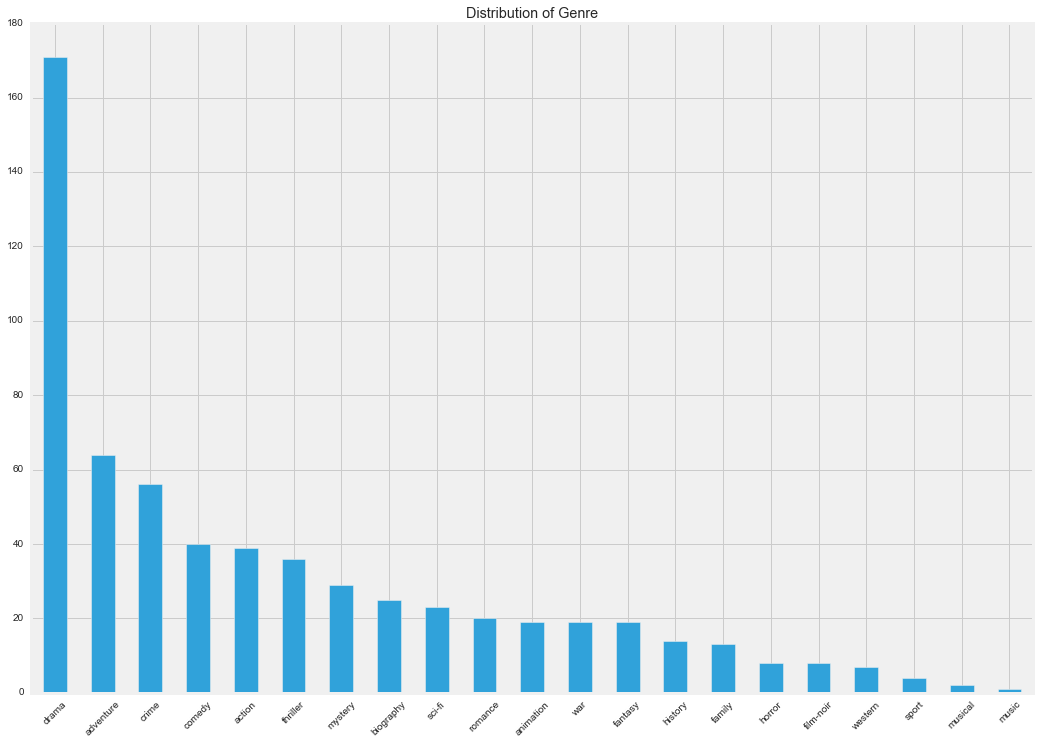

In [300]:
# plot genre distribution 
p = genre.T
p['sum'] = genre.sum()
p = p.sort(['sum'], ascending=0)
p['sum'].plot(kind = 'bar', rot =45, figsize =(16,12))
plt.title('Distribution of Genre')

/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


usa          182
uk            46
france        18
germany       15
japan         14
italy         14
spain          7
hong kong      5
sweden         5
india          5
Name: sum, dtype: int64

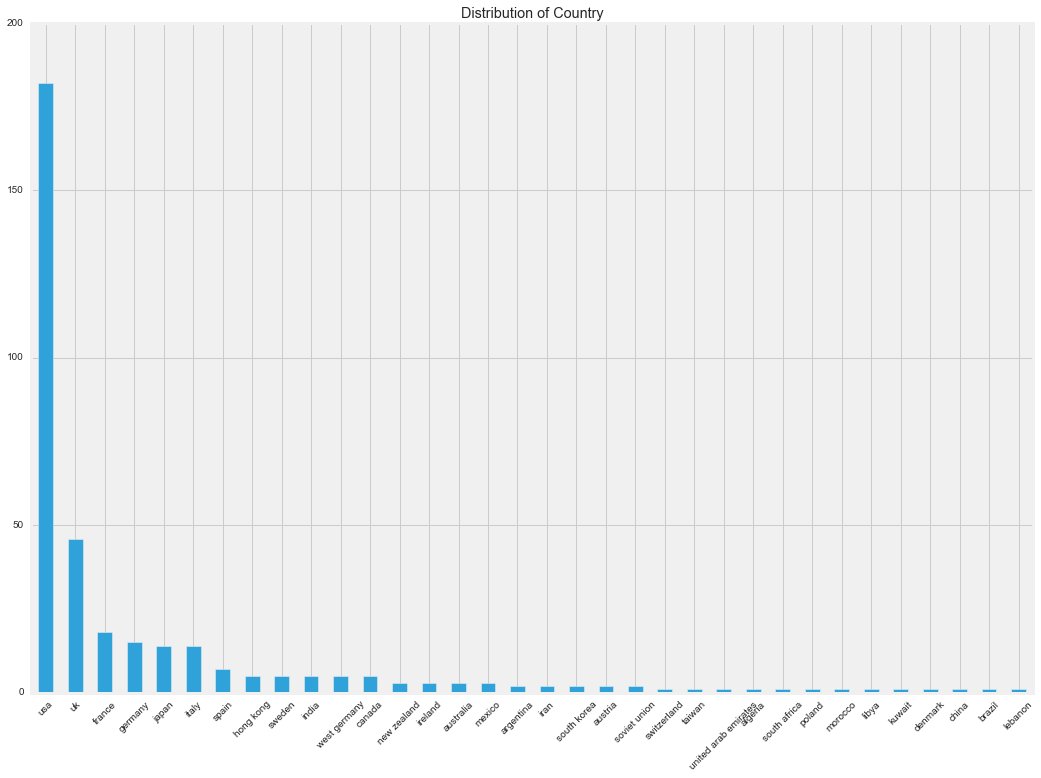

In [301]:
# plot country distribution 
p = country.T
p['sum'] = country.sum()
p = p.sort(['sum'], ascending=0)
p['sum'].plot(kind = 'bar', rot =45, figsize =(16,12))
plt.title('Distribution of Country')
p['sum'].head(10)

/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


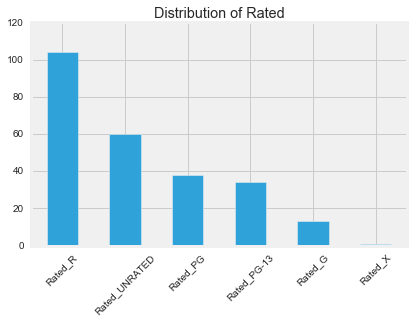

In [302]:
# plot rated distribution 
p = rated.T
p['sum'] = rated.sum()
p = p.sort(['sum'], ascending=0)
p['sum'].plot(kind = 'bar', rot =45)
plt.title('Distribution of Rated')

/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


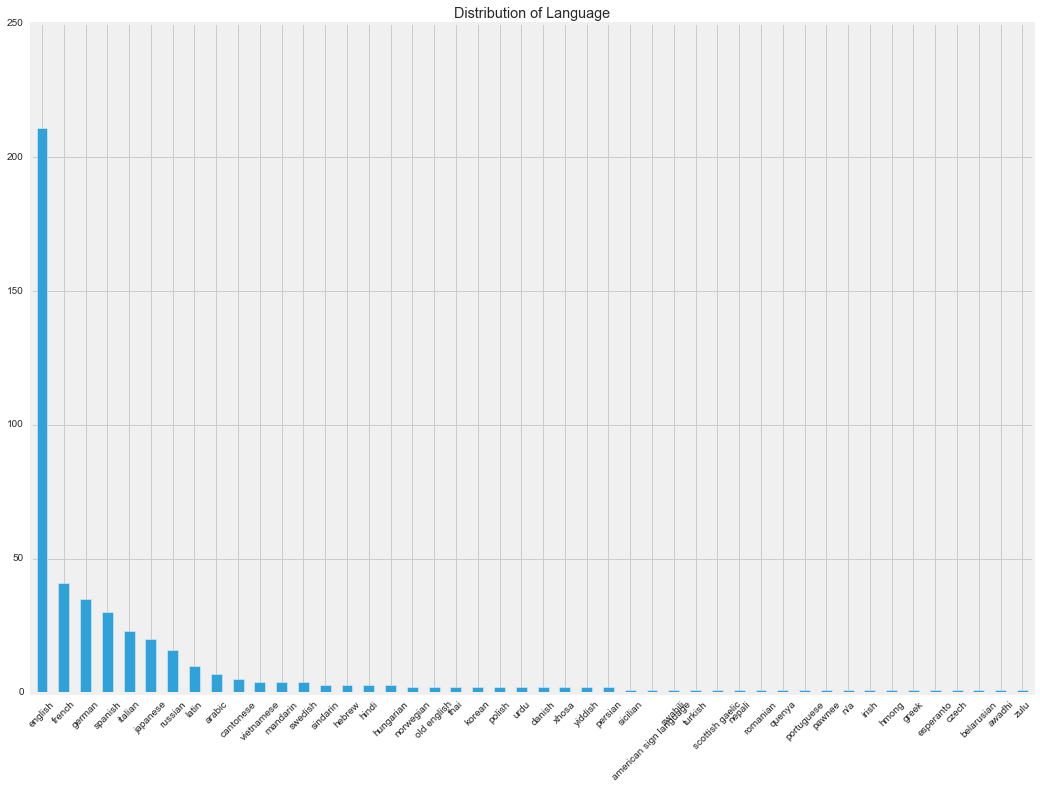

In [303]:
# plotting languages
p = language.T
p['sum'] = language.sum()
p = p.sort(['sum'], ascending=0)
p['sum'].plot(kind = 'bar', rot =45, figsize =(16,12))
plt.title('Distribution of Language')

## + Classification + 

In [304]:
# import train_test_split
from sklearn import linear_model
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.cross_validation import train_test_split, cross_val_predict
from sklearn.metrics import r2_score, classification_report 
from sklearn.multiclass import OutputCodeClassifier

In [305]:
# set features 
data = fdf.ix[:, fdf.columns.difference(['rating'])]
x = data.as_matrix(columns=None)

In [306]:
# check the predicted class
fdf.rating.value_counts()

8.1    70
8.3    48
8.2    39
8.5    26
8.4    25
8.6    15
8.7     7
8.9     6
8.0     6
8.8     4
9.0     2
9.2     1
9.3     1
Name: rating, dtype: int64

In [307]:
def y_dummy(x):
    if x == 8.1:
        return 3
    elif x <= 8.3:
        return 2 
    else:
        return 1
        
fdf['rating1'] = fdf["rating"].apply(y_dummy)

In [308]:
# set target variable
target = fdf['rating1']
y = target

In [309]:
# implement train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=3)

# print out the size of train and test sets 
print "Train", x_train.shape, y_train.shape
print "Test ", x_test.shape, y_test.shape

Train (125, 3584) (125,)
Test  (125, 3584) (125,)


In [310]:
lr = linear_model.LogisticRegression()
result = lr.fit(x_train, y_train)

print "Score:", result.score(x_test, y_test) 

Score: 0.536


In [311]:
coef = pd.DataFrame()
coef['columns'] = data.columns
coef['coefficients'] = result.coef_[0].round(6)
coef['Odds_ratio'] = np.exp(result.coef_[0]).round(6)
print coef.sort(['coefficients'],ascending=1).head(5)
print ''
print coef.sort(['coefficients'],ascending=0).head(5)

      columns  coefficients  Odds_ratio
35    Rated_R     -0.441878    0.642828
3336       uk     -0.317709    0.727815
3085    story     -0.315145    0.729683
3021  spanish     -0.303176    0.738469
32    Rated_G     -0.289822    0.748397

            columns  coefficients  Odds_ratio
36    Rated_UNRATED      0.599756    1.821675
1112         family      0.480265    1.616503
1683  james stewart      0.345691    1.412966
33         Rated_PG      0.343373    1.409695
1612      insurance      0.327893    1.388040


/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [312]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
predictions = result.predict(x_test)
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          1       0.72      0.53      0.61        40
          2       0.46      0.89      0.60        47
          3       1.00      0.11      0.19        38

avg / total       0.71      0.54      0.48       125



In [313]:
cm = confusion_matrix(y_test, predictions)
print cm

[[21 19  0]
 [ 5 42  0]
 [ 3 31  4]]


In [314]:
import matplotlib.patheffects as path_effects
# function that plots confusion matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels= [1,2,3], cmap=plt.cm.Blues, t_number =2):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(t_number)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

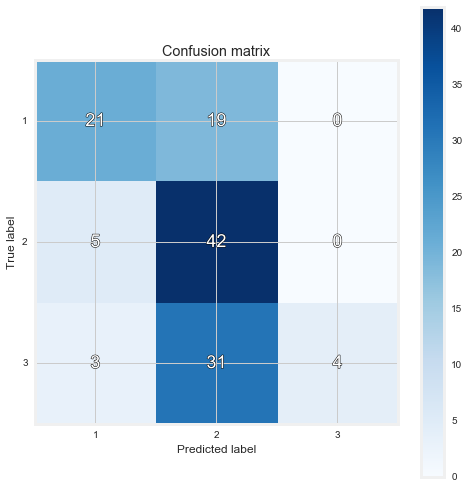

In [315]:
# plot confusion matrix
plot_confusion_matrix(cm, labels = [1,2,3],title='Confusion matrix', cmap=plt.cm.Blues,t_number =3)

In [316]:
# Perform 6-fold cross validation
scores = cross_val_score(result, x, y, cv=6)
print "Cross-validated scores:", scores 
print 'Mean Score:', scores.mean()

# Make cross validated predictions
predictions = cross_val_predict(result, x, y, cv=6)
r2_s = r2_score(y, predictions)
print "Cross-Predicted R^2:", r2_s

Cross-validated scores: [ 0.37209302  0.53488372  0.46511628  0.43902439  0.5         0.6       ]
Mean Score: 0.485186235583
Cross-Predicted R^2: -0.174251174251


### 2 categories

In [317]:
data = fdf.ix[:, fdf.columns.difference(['rating','rating1','rating2'])]
x = data.as_matrix(columns=None)

fdf['rating2'] = fdf['rating'].map(lambda x: 1 if x >= fdf['rating'].mean() else 0)
# set target variable
target = fdf['rating2']
y = target

In [318]:
# implement train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=3, stratify=y)

# print out the size of train and test sets 
print "Train", x_train.shape, y_train.shape
print "Test ", x_test.shape, y_test.shape


Train (126, 3584) (126,)
Test  (124, 3584) (124,)


In [319]:
lr = linear_model.LogisticRegression()
result = lr.fit(x_train, y_train)

print "Score:", result.score(x_test, y_test) 

Score: 0.709677419355


In [320]:
coef = pd.DataFrame()
coef['columns'] = data.columns
coef['coefficients'] = result.coef_[0].round(6)
coef['Odds_ratio'] = np.exp(result.coef_[0]).round(6)
print coef.sort(['coefficients'],ascending=1).head(5)
print ''
print coef.sort(['coefficients'],ascending=0).head(5)

      columns  coefficients  Odds_ratio
720   critics     -0.008136    0.991897
3561     year     -0.001102    0.998899
2225    month     -0.000966    0.999035
1220   french     -0.000237    0.999763
3336       uk     -0.000182    0.999818

            columns  coefficients  Odds_ratio
2808        runtime      0.006808    1.006831
3387           user      0.001498    1.001500
2266        mystery      0.000231    1.000231
36    Rated_UNRATED      0.000185    1.000185
3293          tramp      0.000179    1.000179


/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Lydia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [321]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
predictions = result.predict(x_test)
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          0       0.74      0.85      0.79        81
          1       0.61      0.44      0.51        43

avg / total       0.70      0.71      0.70       124



[[69 12]
 [24 19]]


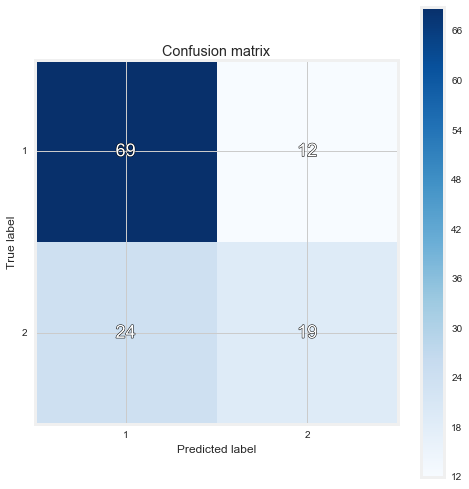

In [322]:
cm2 = confusion_matrix(y_test, predictions)
print cm2
plot_confusion_matrix(cm2, title='Confusion matrix', cmap=plt.cm.Blues)

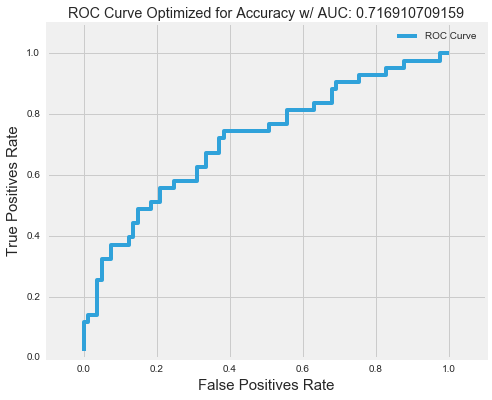

In [323]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split

roc_lr = roc_curve(y_test, result.predict_proba(x_test).T[1])
# create function that plots ROC curve
def getROCcurve(roc, title = 'ROC Curve w/ AUC: ', xlabel ='False Positives Rate', ylabel = 'True Positives Rate'):
    
    fpr, tpr, thresholds = roc
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(7, 6, forward=True)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title)
    plt.legend(loc='best')
    plt.axis([-0.1,1.1,0,1.1])
    
    auc = metrics.auc(fpr,tpr)
    plt.title(title + str(auc))
# plot ROC curve    
getROCcurve(roc_lr,'ROC Curve Optimized for Accuracy w/ AUC: ')

0.645161290323
             precision    recall  f1-score   support

          0       0.74      0.85      0.79        81
          1       0.61      0.44      0.51        43

avg / total       0.70      0.71      0.70       124



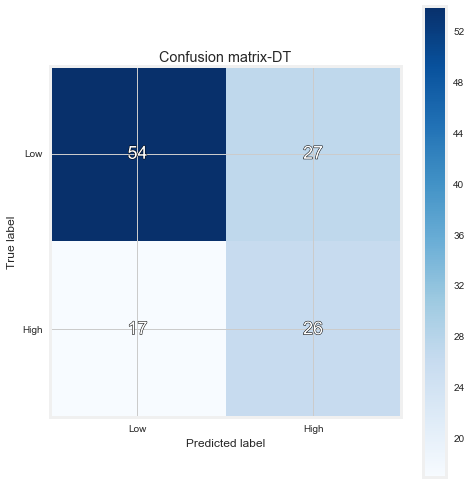

In [324]:
# create decision tree model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=3)
result_dt = dt.fit(x_train, y_train)

print result_dt.score(x_test, y_test)
predictions = result.predict(x_test)
print classification_report(y_test, predictions)
# confusion matrix for decision tree 
cm_dt = confusion_matrix(y_test, result_dt.predict(x_test))
plot_confusion_matrix(cm_dt, labels = ['Low','High'],title='Confusion matrix-DT', cmap=plt.cm.Blues)

In [325]:
from sklearn.grid_search import GridSearchCV
# set parameters
dt_params = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]}
gs_dt = GridSearchCV(dt, dt_params, cv=5, scoring = 'average_precision')
result_dt_b = gs_dt.fit(x_train,y_train)

In [326]:
print result_dt_b.score(x_test, y_test)

0.676229508197


/Users/Lydia/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [327]:
print gs_dt.best_score_
print gs_dt.best_params_
print gs_dt.best_estimator_

0.676091269841
{'max_features': 2, 'max_leaf_nodes': 7, 'min_samples_split': 1, 'max_depth': 5, 'min_samples_leaf': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=2, max_leaf_nodes=7, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=3, splitter='best')


In [328]:
from sklearn.ensemble import BaggingClassifier
# set parameters for bagging classifier 
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=3),random_state=3)
# print out scores 
# scores = cross_val_score(bdt, x, y, cv=5, n_jobs=-1)
# scores.mean(), scores.std()
result_bdt = bdt.fit(x_train,y_train)
print result_bdt.score(x_test, y_test)

0.75


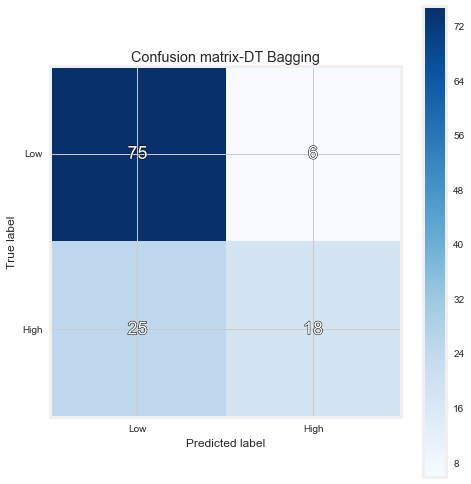

In [329]:
# create confusion matrix
cm_bdt = confusion_matrix(y_test, result_bdt.predict(x_test))
plot_confusion_matrix(cm_bdt , labels = ['Low','High'],title='Confusion matrix-DT Bagging', cmap=plt.cm.Blues)

In [330]:
# set parameters
bdt_params = {
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }
    
# create model 
gs_bdt = GridSearchCV(bdt, bdt_params, n_jobs=-1, cv=5)
gs_bdt.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=3, spl...0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=3, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [0.5, 0.7, 1.0], 'max_samples': [0.5, 0.7, 1.0], 'n_estimators': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [331]:
print gs_bdt.best_score_
print gs_bdt.best_params_
print gs_bdt.best_estimator_

0.793650793651
{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 5}
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=3, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.7, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=3, verbose=0, warm_start=False)


In [332]:
bdt_b = (BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=3, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=3, verbose=0, warm_start=False))
result_bdt_b = bdt_b.fit(x_train, y_train)

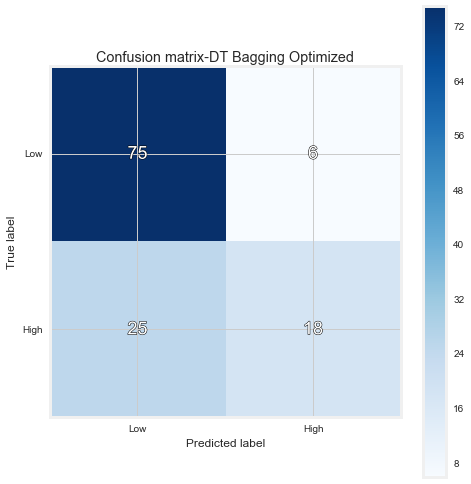

In [333]:
# create confusion matrix
cm_bdt_b = confusion_matrix(y_test, result_bdt_b.predict(x_test))
plot_confusion_matrix(cm_bdt_b, labels = ['Low','High'], title='Confusion matrix-DT Bagging Optimized', cmap=plt.cm.Blues)

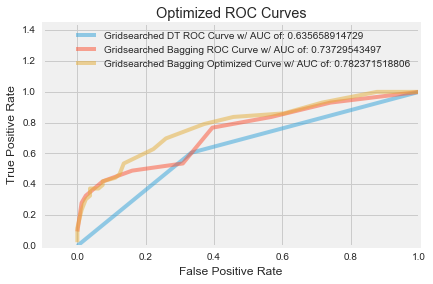

In [334]:
# assign the 
roc_dt_b = roc_curve(y_test, result_dt.predict_proba(x_test).T[1])
roc_bdt = roc_curve(y_test, result_bdt.predict_proba(x_test).T[1])
roc_bdt_b = roc_curve(y_test, result_bdt_b.predict_proba(x_test).T[1])

# plot roc curves 
fpr4, tpr4, thresholds = roc_dt_b
fpr5, tpr5, thresholds = roc_bdt
fpr6, tpr6, thresholds = roc_bdt_b
fig,ax = plt.subplots()
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
ax.plot(fpr4, tpr4, label='Gridsearched DT ROC Curve w/ AUC of: ' + str(auc4), alpha = 0.5)
ax.plot(fpr5, tpr5, label='Gridsearched Bagging ROC Curve w/ AUC of: ' + str(auc5), alpha = 0.5)
ax.plot(fpr6, tpr6, label='Gridsearched Bagging Optimized Curve w/ AUC of: ' + str(auc6), alpha = 0.5)
plt.title('Optimized ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.1,1,0,1.45])
plt.legend()

In [354]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

rfdt = RandomForestClassifier(random_state=3)
etdt = ExtraTreesClassifier(random_state=3)
abdt = AdaBoostClassifier(random_state=3)
gbdt = GradientBoostingClassifier(random_state=3)

result_rfdt = rfdt.fit(x_train,y_train)
result_etdt = etdt.fit(x_train,y_train)
result_abdt = abdt.fit(x_train,y_train)
result_gbdt = gbdt.fit(x_train,y_train)

print "Random Forest Accuracy Score: " + str(result_rfdt.score(x_test,y_test))
print "Extra Tree Accuracy Score: " + str(result_etdt.score(x_test,y_test))
print "Ada Boost Accuracy Score: " + str(result_abdt.score(x_test,y_test))
print "Gradient Boosting Accuracy Score: " + str(result_gbdt.score(x_test,y_test))

Random Forest Accuracy Score: 0.653225806452
Extra Tree Accuracy Score: 0.645161290323
Ada Boost Accuracy Score: 0.693548387097
Gradient Boosting Accuracy Score: 0.733870967742


In [355]:
result_gbdt.get_params()

{'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 3,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

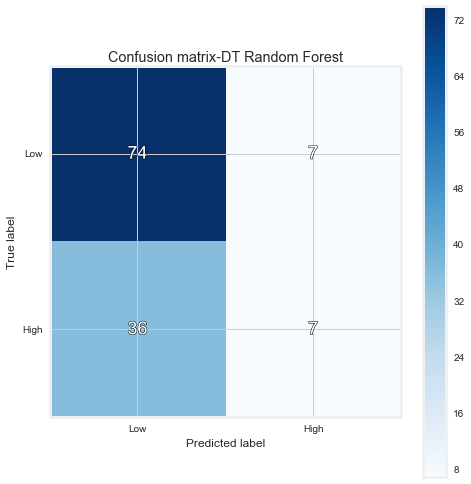

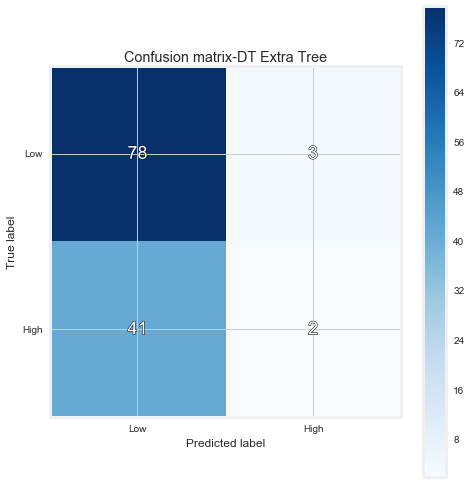

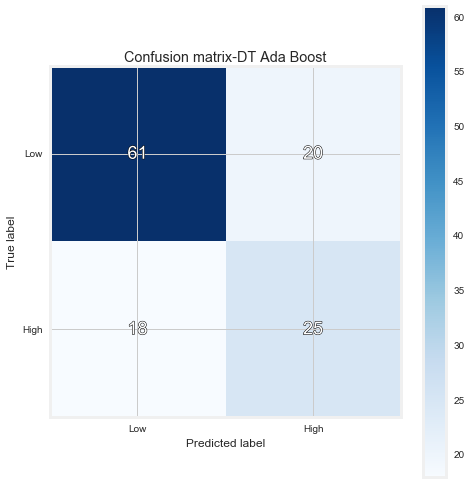

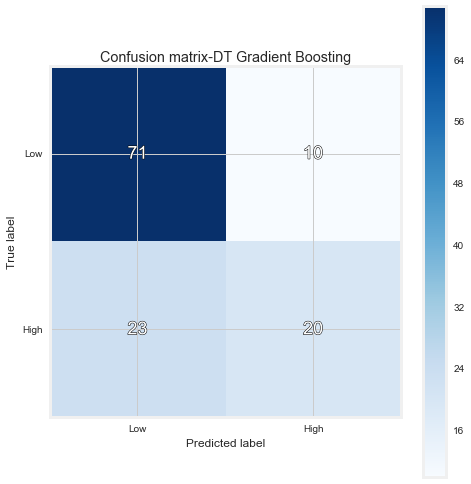

In [336]:
cm_rfdt = confusion_matrix(y_test, result_rfdt.predict(x_test))
plot_confusion_matrix(cm_rfdt , labels = ['Low','High'],title='Confusion matrix-DT Random Forest', cmap=plt.cm.Blues)

cm_etdt = confusion_matrix(y_test, result_etdt.predict(x_test))
plot_confusion_matrix(cm_etdt , labels = ['Low','High'],title='Confusion matrix-DT Extra Tree', cmap=plt.cm.Blues)

cm_abdt = confusion_matrix(y_test, result_abdt.predict(x_test))
plot_confusion_matrix(cm_abdt , labels = ['Low','High'],title='Confusion matrix-DT Ada Boost', cmap=plt.cm.Blues)

cm_gbdt = confusion_matrix(y_test, result_gbdt.predict(x_test))
plot_confusion_matrix(cm_gbdt , labels = ['Low','High'],title='Confusion matrix-DT Gradient Boosting', cmap=plt.cm.Blues)

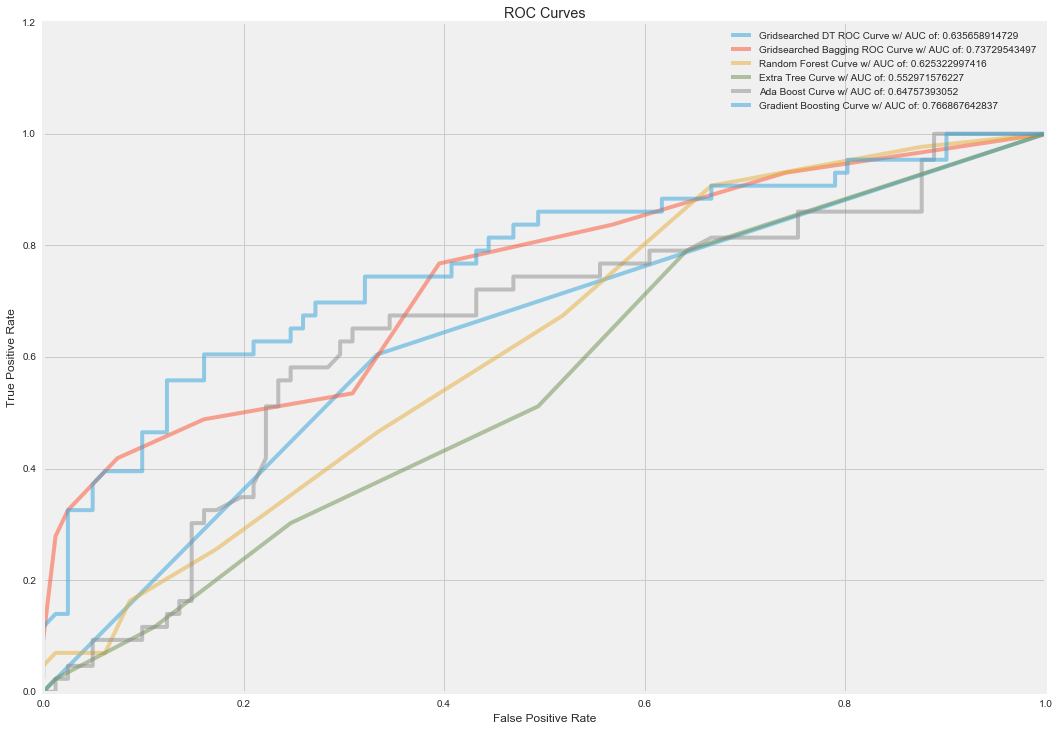

In [337]:
roc_rfdt = roc_curve(y_test, result_rfdt.predict_proba(x_test).T[1])
roc_etdt = roc_curve(y_test, result_etdt.predict_proba(x_test).T[1])
roc_abdt = roc_curve(y_test, result_abdt.predict_proba(x_test).T[1])
roc_gbdt = roc_curve(y_test, result_gbdt.predict_proba(x_test).T[1])

fpr4, tpr4, thresholds = roc_dt_b
fpr5, tpr5, thresholds = roc_bdt

fpr7, tpr7, thresholds = roc_rfdt
fpr8, tpr8, thresholds = roc_etdt
fpr9, tpr9, thresholds = roc_abdt
fpr10, tpr10, thresholds = roc_gbdt

fig,ax = plt.subplots(figsize = (16,12))
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc7 = metrics.auc(fpr7,tpr7)
auc8 = metrics.auc(fpr8,tpr8)
auc9 = metrics.auc(fpr9,tpr9)
auc10 = metrics.auc(fpr10,tpr10)
ax.plot(fpr4, tpr4, label='Gridsearched DT ROC Curve w/ AUC of: ' + str(auc4), alpha = 0.5)
ax.plot(fpr5, tpr5, label='Gridsearched Bagging ROC Curve w/ AUC of: ' + str(auc5), alpha = 0.5)
ax.plot(fpr7, tpr7, label='Random Forest Curve w/ AUC of: ' + str(auc7), alpha = 0.5)
ax.plot(fpr8, tpr8, label='Extra Tree Curve w/ AUC of: ' + str(auc8), alpha = 0.5)
ax.plot(fpr9, tpr9, label='Ada Boost Curve w/ AUC of: ' + str(auc9), alpha = 0.5)
ax.plot(fpr10, tpr10, label='Gradient Boosting Curve w/ AUC of: ' + str(auc10), alpha = 0.5)


plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([0,1,0,1.2])
plt.legend()

In [338]:
gb_params = {'max_depth':[2,3,4], 'max_features':[2,3,4], 
              'max_leaf_nodes':[5,6,7], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4],'learning_rate':[0.1, 0.2, 0.3]}
gbgs = GridSearchCV(gbdt, gb_params, cv=5)
result_gb_b = gbgs.fit(x_train,y_train)
print gbgs.grid_scores_ 


[mean: 0.65873, std: 0.02533, params: {'max_leaf_nodes': 5, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 1, 'max_features': 2, 'max_depth': 2}, mean: 0.65873, std: 0.02533, params: {'max_leaf_nodes': 5, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'max_features': 2, 'max_depth': 2}, mean: 0.65873, std: 0.02533, params: {'max_leaf_nodes': 5, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'max_features': 2, 'max_depth': 2}, mean: 0.65873, std: 0.02533, params: {'max_leaf_nodes': 5, 'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'max_features': 2, 'max_depth': 2}, mean: 0.65079, std: 0.01004, params: {'max_leaf_nodes': 5, 'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 1, 'max_features': 2, 'max_depth': 2}, mean: 0.65079, std: 0.01004, params: {'max_leaf_nodes': 5, 'learning_rate': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'max_features': 2, 'max_depth': 2}, mean: 0.65079, 

In [339]:
print gbgs.best_params_ 
print gbgs.best_score_

{'max_leaf_nodes': 5, 'learning_rate': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 1, 'max_features': 2, 'max_depth': 2}
0.738095238095


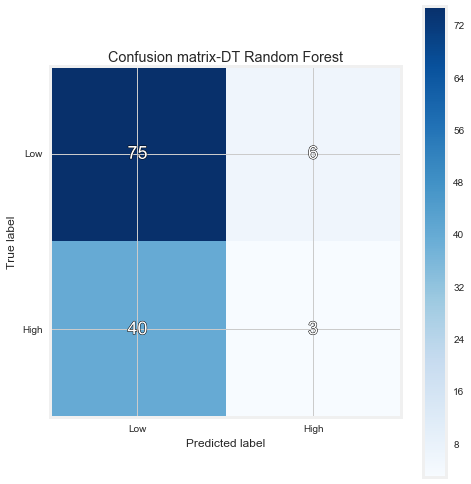

In [340]:
cm_gsgb = confusion_matrix(y_test, result_gb_b.predict(x_test))
plot_confusion_matrix(cm_gsgb , labels = ['Low','High'],title='Confusion matrix-DT Random Forest', cmap=plt.cm.Blues)

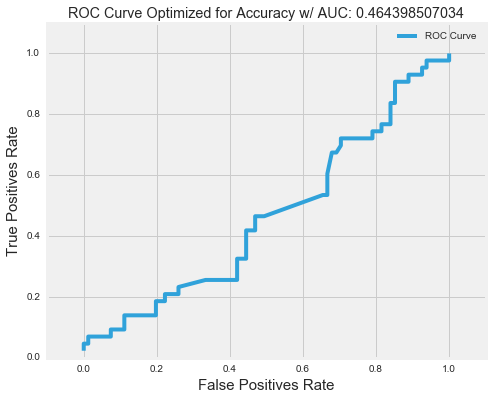

In [341]:
roc_lr = roc_curve(y_test, result_gb_b.predict_proba(x_test).T[1])
getROCcurve(roc_lr,'ROC Curve Optimized for Accuracy w/ AUC: ')

In [344]:
feature_importances_dt = pd.DataFrame(dt.feature_importances_,
                                   index = fdf.ix[:, fdf.columns.difference(['rating','rating1','rating2'])].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Decision Tree:'
feature_importances_dt.head(10)

Decision Tree:


,importance
rating_n,0.359071
year,0.080979
love,0.063122
defend,0.055386
group,0.052913
charles chaplin,0.052471
user,0.051873
window,0.034393
martina gedeck,0.033367
Rated_G,0.033259


In [345]:
feature_importances_rf = pd.DataFrame(rfdt.feature_importances_,
                                   index = fdf.ix[:, fdf.columns.difference(['rating','rating1','rating2'])].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Random Forest'
feature_importances_rf.head(10)

Random Forest


,importance
user,0.040105
runtime,0.031663
love,0.027652
sean astin,0.022179
year,0.020387
rating_n,0.018911
harrison ford,0.011953
sauron,0.011841
critics,0.011262
charles chaplin,0.010202


In [346]:
feature_importances_et = pd.DataFrame(etdt.feature_importances_,
                                   index = fdf.ix[:, fdf.columns.difference(['rating','rating1','rating2'])].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Extra Tree'
feature_importances_et.head(10)

Extra Tree


,importance
rating_n,0.045309
mysterious,0.018739
goes,0.015818
joins,0.014613
police,0.013454
girl,0.013304
harrison ford,0.012141
redemption,0.011752
defend,0.010691
sindarin,0.009398


In [347]:
feature_importances_ab = pd.DataFrame(abdt.feature_importances_,
                                   index = fdf.ix[:, fdf.columns.difference(['rating','rating1','rating2'])].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Ada Boost'
feature_importances_ab.head(10)

Ada Boost


,importance
rating_n,0.26
year,0.08
usa,0.08
critics,0.06
user,0.04
runtime,0.04
james stewart,0.04
love,0.02
work,0.02
italy,0.02


In [348]:
feature_importances_gb = pd.DataFrame(gbdt.feature_importances_,
                                   index = fdf.ix[:, fdf.columns.difference(['rating','rating1','rating2'])].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Gradient Boosting'
feature_importances_gb.head(10)

Gradient Boosting


,importance
rating_n,0.111332
survive,0.055190
user,0.054927
defend,0.047713
lost,0.046639
year,0.040966
deep,0.040481
critics,0.032823
mysterious,0.030858
love,0.030768


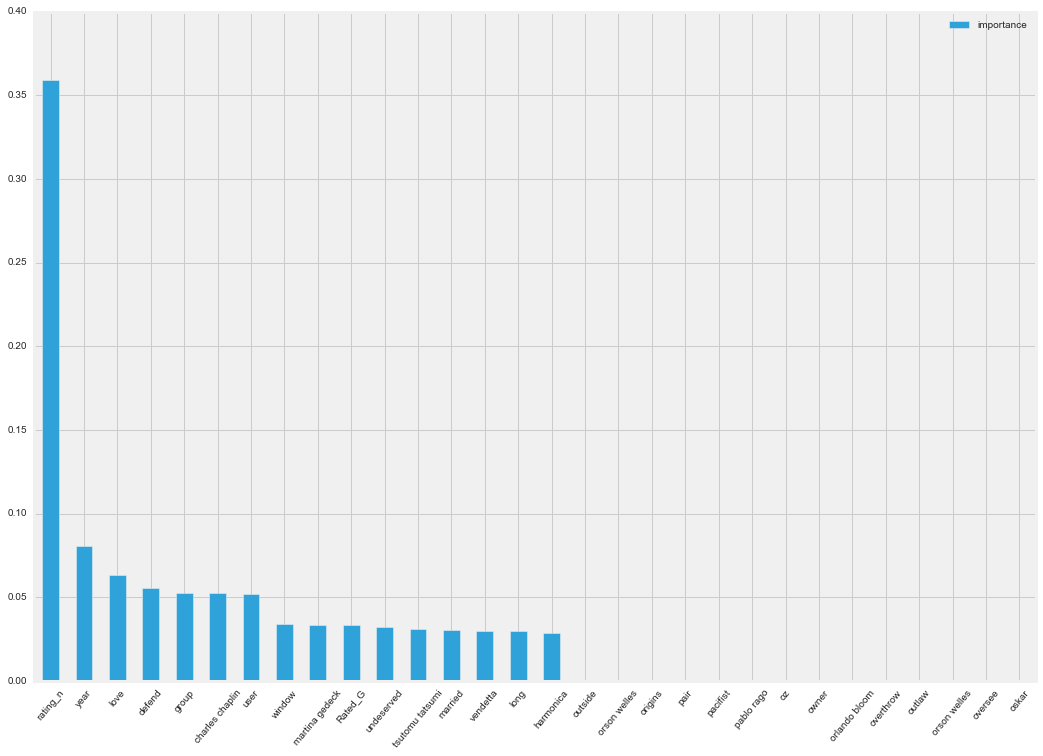

In [349]:
feature_importances_dt.iloc[:30,:].plot(kind='bar', rot =50, figsize=(16,12))

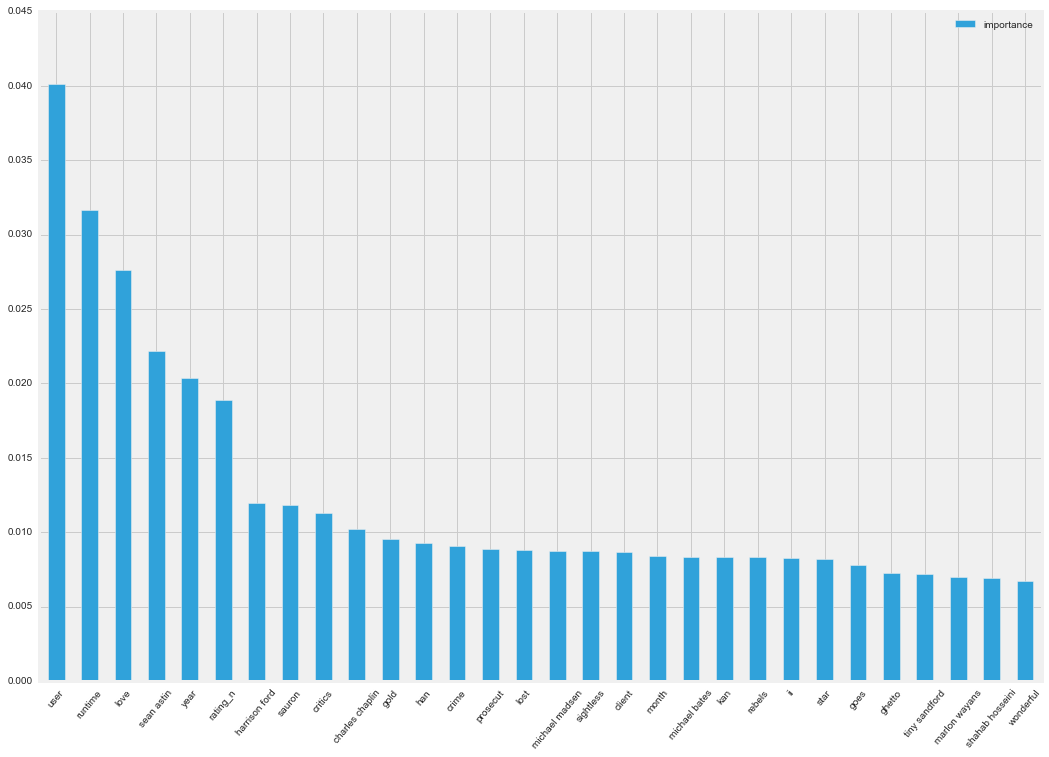

In [350]:
feature_importances_rf.iloc[:30,:].plot(kind='bar', rot =50, figsize=(16,12))

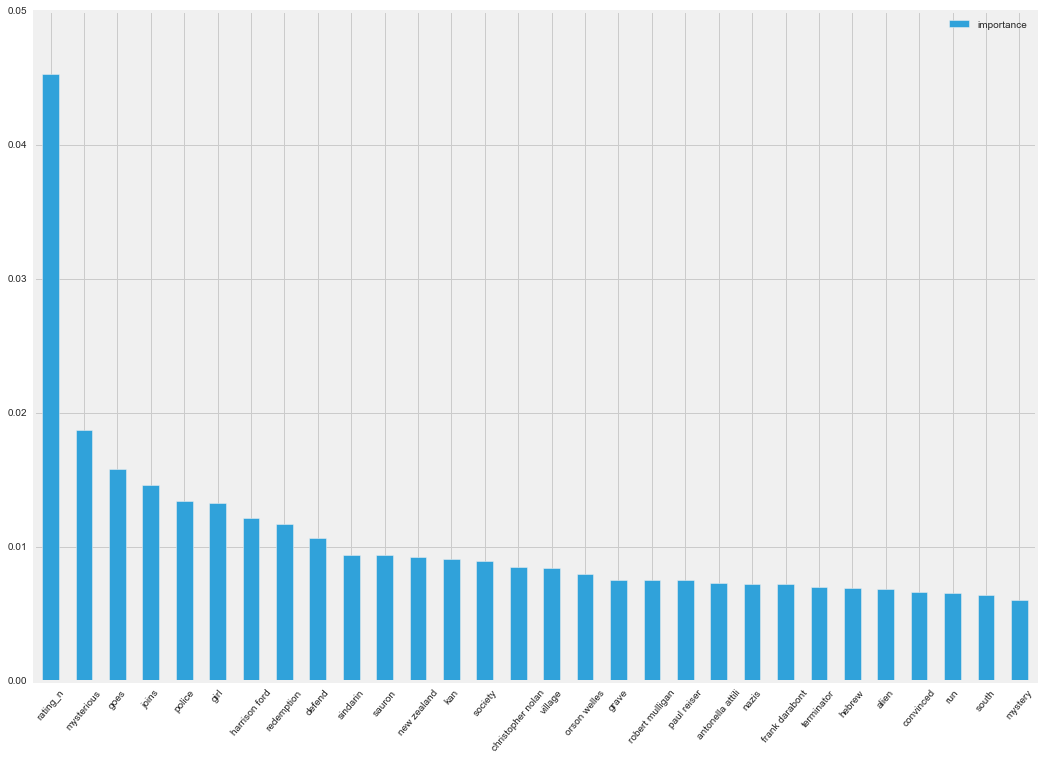

In [351]:
feature_importances_et.iloc[:30,:].plot(kind='bar', rot =50, figsize=(16,12))

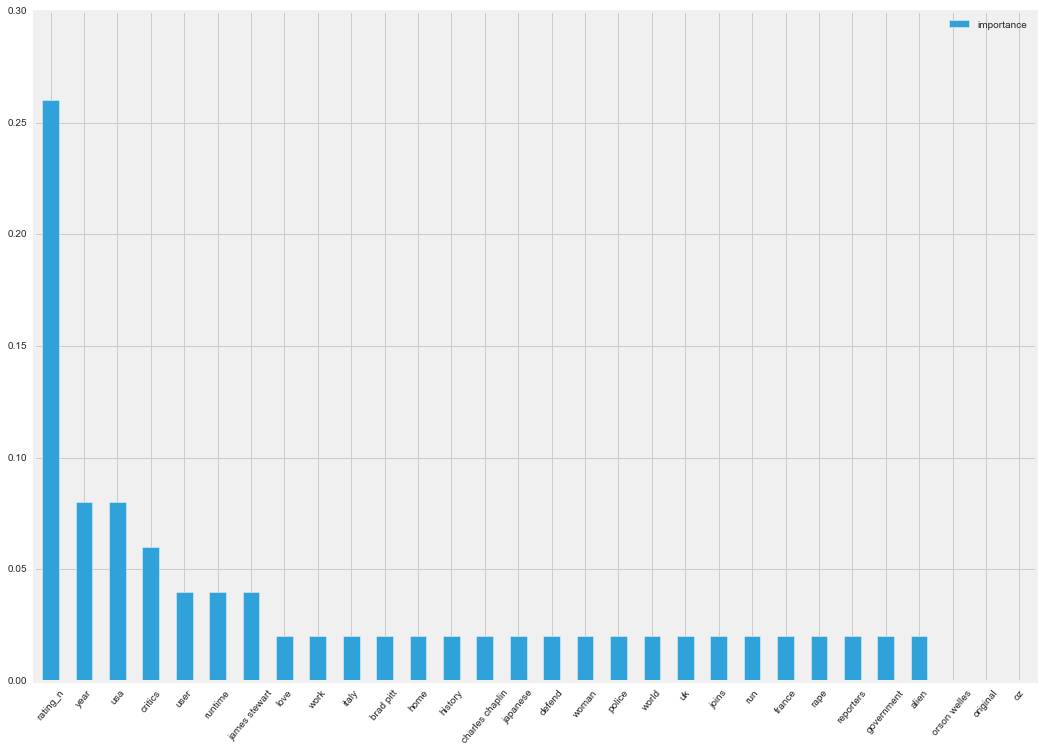

In [352]:
feature_importances_ab.iloc[:30,:].plot(kind='bar', rot =50, figsize=(16,12))

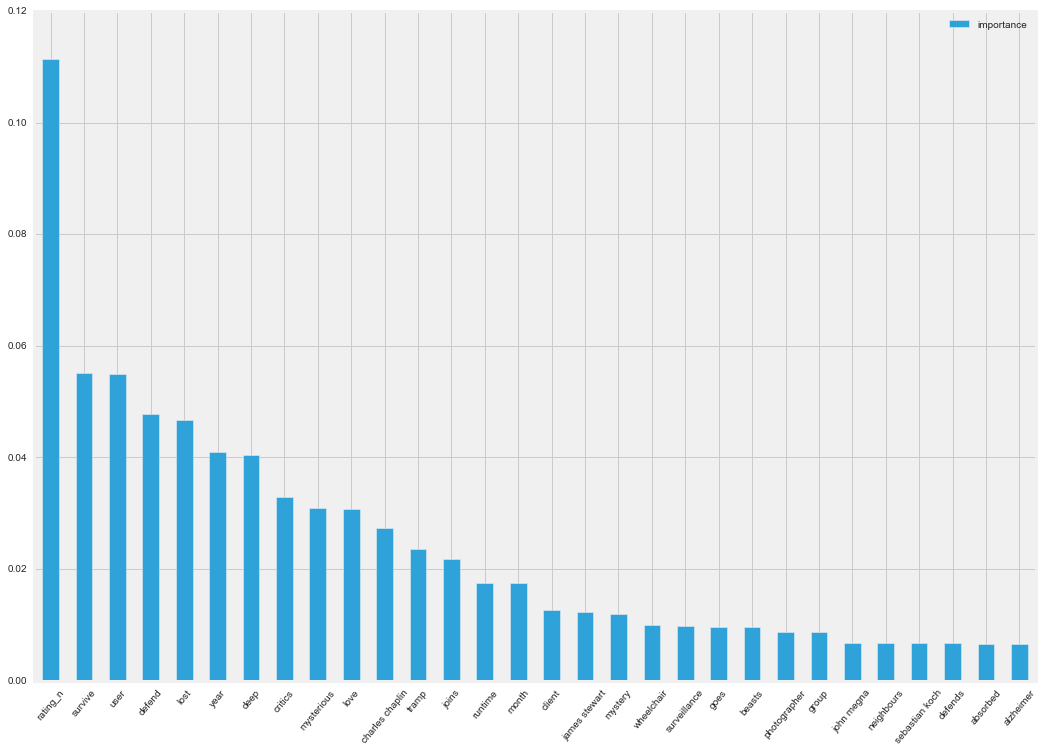

In [353]:
feature_importances_gb.iloc[:30,:].plot(kind='bar', rot =50, figsize=(16,12))